In [ ]:
import numpy as np
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
class ANN:
    def __init__(self, intermediate_size, activation_fn=np.tanh):
        self._parameters = self._init_params([1, intermediate_size, 1])
        self._activation_fn = activation_fn

    def parameters(self):
        return self._parameters

    def update_params(self, params):
        self._parameters = params

    @staticmethod
    def _init_params(sizes):
        params = {}
        for i in range(1, len(sizes)):
            params[f"w{i}"] = np.random.normal(scale=0.01, size=(sizes[i], sizes[i - 1]))
            params[f"b{i}"] = np.random.normal(scale=0.01, size=(sizes[i], 1))
        return params

    def forward(self, inputs):
        num_layers = len(self._parameters) // 2
        activations = {}
        for i in range(1, num_layers+1):
            if i == 1:
                activations[f"z{i}"] = self._parameters[f"w{i}"] @ inputs + self._parameters[f"b{i}"]
                activations[f"a{i}"] = self._activation_fn(activations[f"z{i}"])
            else:
                activations[f"z{i}"] = self._parameters[f"w{i}"] @  activations[f"a{i-1}"] + self._parameters[f"b{i}"]
                if i == num_layers:
                    activations[f"a{i}"] = activations[f"z{i}"]
                else:
                    activations[f"a{i}"] = self._activation_fn(activations[f"z{i}"])
        return activations

    def backward(self, activations, inputs, targets):
        num_layers = len(self._parameters)//2
        m = len(targets)
        grads = {}
        for i in range(num_layers, 0, -1):
            if i == num_layers:
                dA = 1/m * (activations[f"a{i}"] - targets)
                dZ = dA
            else:
                dA = (self._parameters[f"w{i+1}"].T @ dZ) * (1 - np.tanh(self._parameters[f"w{i+1}"] @ activations[f"a{i}"] + self._parameters[f"b{i}"]) ** 2)
                dZ = np.multiply(dA, np.where(activations[f"a{i}"] >= 0, 1, 0))
            if i==1:
                grads[f"w{i}"] = 1/m * (dZ @ inputs.T)
                grads[f"b{i}"] = 1/m * np.sum(dZ, axis=1, keepdims=True)
            else:
                grads[f"w{i}"] = 1/m * (dZ @ activations[f"a{i-1}"].T)
                grads[f"b{i}"] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        return grads


def optimizer_step(params, grads, lr):
    num_layers = len(params) // 2
    new_params = {}
    for i in range(1, num_layers+1):
        new_params[f"w{i}"] = params[f"w{i}"] - lr * grads[f"w{i}"]
        new_params[f"b{i}"] = params[f"b{i}"] - lr * grads[f"b{i}"]
    return new_params


def train(X, y, intermediate_size, n_epochs, lr):
    model = ANN(intermediate_size)

    for _ in range(1, n_epochs + 1):
        activations = model.forward(X)
        grads = model.backward(activations, X, y.T)
        new_params = optimizer_step(model.parameters(), grads, lr)
        model.update_params(new_params)

    return model


def compute_score(model, X, y):
    activations = model.forward(X)
    score = np.sqrt(mean_squared_error(y, activations["a2"].T))
    return score

  0%|          | 0/99 [00:00<?, ?it/s]

Training Loss for various intermediate sizes [152.35617720029254, 147.38387762153826, 141.25242891693478, 135.42275045481037, 129.63637149058908, 126.0047653258743, 125.06355477439872, 117.56868983978391, 115.7479679112358, 109.64469535630117, 106.01194899454018, 102.38241914808457, 100.82755741902368, 95.58746249144107, 95.1743195342998, 90.52275344549425, 87.12198297826552, 85.67618183558534, 81.2911895815445, 84.09610131251614, 77.36931141809909, 74.22079278972875, 69.95279156297391, 71.33956212507537, 68.53047813862096, 65.71354010655543, 68.03444268424275, 63.9368597545039, 60.68083224751395, 59.55330728380021, 55.58626439536089, 57.63799161901424, 52.98407060234716, 54.783061752897815, 51.89745977516605, 48.91484543495597, 48.853729389890695, 46.89431316239112, 44.81948430571601, 46.10374129771937, 43.454028633423505, 43.332280437035536, 42.49191112709402, 40.89765015799476, 38.72256213455815, 39.27151152219453, 37.9648385791325, 36.60757829414194, 35.996911034261174, 35.62939943

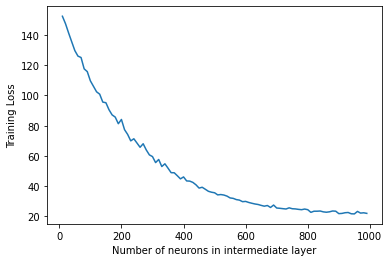

In [ ]:
ages = [15, 15, 15, 18, 28, 29, 37, 37, 44, 50, 50, 60, 61, 64, 65, 65, 72, 75, 75, 82, 85, 91, 91, 97, 98, 125, 142, 142, 147, 147, 150, 159, 165, 183, 192, 195, 218, 218, 219, 224, 225, 227, 232, 232, 237, 246, 258, 276, 285, 300, 301, 305, 312, 317, 338, 347, 354, 357, 375, 394, 513, 535, 554, 591, 648, 660, 705, 723, 756, 768, 860]
weights = [21.66, 22.75, 22.3, 31.25, 44.79, 40.55, 50.25, 46.88, 52.03, 63.47, 61.13, 81, 73.09, 79.09, 79.51, 65.31, 71.9, 86.1, 94.6, 92.5, 105, 101.7, 102.9, 110, 104.3, 134.9, 130.68, 140.58, 155.3, 152.2, 144.5, 142.15, 139.81, 153.22, 145.72, 161.1, 174.18, 173.03, 173.54, 178.86, 177.68, 173.73, 159.98, 161.29, 187.07, 176.13, 183.4, 186.26, 189.66, 186.09, 186.7, 186.8, 195.1, 216.41, 203.23, 188.38, 189.7, 195.31, 202.63, 224.82, 203.3, 209.7, 233.9, 234.7, 244.3, 231, 242.4, 230.77, 242.57, 232.12, 246.7]
ages, weights = np.array(ages)[None], np.array(weights)

n_epochs = 450
lr = 1e-3
metrics, intermediate_sizes = [], []
for intermediate_size in tqdm(range(10, 1000, 10)):
    trained_model = train(ages, weights, intermediate_size, n_epochs, lr)
    score = compute_score(trained_model, ages, weights)
    metrics.append(score)
    intermediate_sizes.append(intermediate_size)

print("Training Loss for various intermediate sizes", metrics)
plt.plot(intermediate_sizes, metrics)
plt.xlabel("Number of neurons in intermediate layer")
plt.ylabel("Training Loss")
plt.show()